In [1]:
import os
import numpy as np
import scipy.linalg as linalg
from scipy.io.wavfile import read, write
from matplotlib import pyplot as plt
import librosa
from tqdm import tqdm, trange
import IPython

In [4]:
src = '/Users/sterling-gg/Downloads/tts_datasets/train/Chernobrovina/wavs/6a84ba92f00a817be1bf6376b18bb976.wav'
r, a = read(src)
print(a[12312:12312+1000])
a = a / 2**15  # convert 2byte wav to 4byte wav
print(a[12312:12312+1000])


[-1874 -1643 -1393 -1184  -997  -809  -608  -364  -111   132   365   561
   707   914  1171  1434  1689  1902  2112  2347  2572  2827  3099  3325
  3569  3843  4133  4450  4743  5003  5250  5493  5750  6022  6330  6628
  6965  7307  7623  7946  8251  8507  8649  8618  8478  8332  8269  8288
  8297  8313  8317  8255  8219  8145  7955  7640  7222  6882  6686  6478
  6247  6007  5653  5191  4746  4224  3690  3161  2616  2187  1739  1175
   610    13  -584 -1102 -1704 -2306 -2717 -3077 -3405 -3715 -4123 -4544
 -4905 -5206 -5327 -5402 -5630 -5803 -5873 -5955 -5994 -6107 -6226 -6242
 -6324 -6394 -6405 -6485 -6540 -6560 -6657 -6703 -6721 -6741 -6626 -6454
 -6385 -6353 -6359 -6266 -6047 -5902 -5829 -5714 -5609 -5476 -5298 -5146
 -5035 -4955 -4822 -4562 -4327 -4215 -4100 -3969 -3817 -3649 -3521 -3368
 -3123 -2838 -2536 -2288 -2129 -1966 -1760 -1507 -1231 -1005  -849  -654
  -398  -122   100   250   414   629   854  1127  1407  1636  1854  2078
  2301  2514  2735  2995  3333  3664  3945  4212  4

In [5]:
IPython.display.Audio(src)

In [27]:
stft_params = {'hop_length':128, 'win_length':1024}

(513, 616)


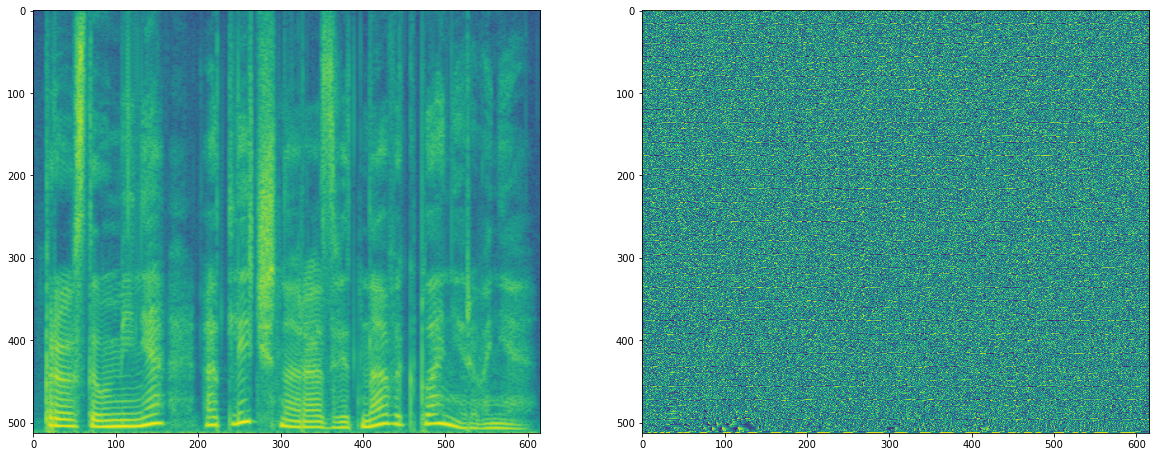

In [28]:
x = librosa.core.stft(a, n_fft=1024, **stft_params)

spectrogram = np.abs(x)
log_spectrogram = np.log(1.e-12 + spectrogram)
gt_phase = np.angle(x)

print(x.shape)

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(log_spectrogram[::-1])
plt.subplot(122)
plt.imshow(gt_phase[::-1])

In [30]:
def griffin_lim(spec, initial_phase, iterations=32):
    phase = initial_phase
    
    for i in trange(iterations):
        signal = librosa.core.istft(spec * np.exp(1j * phase), **stft_params)
        complex_stft = librosa.core.stft(signal, **stft_params, n_fft=1024)
        phase = np.angle(complex_stft)
    
    return phase

In [31]:
initial_phase = -np.pi + 2*np.pi*np.random.random(size=spectrogram.shape)
reconstructed_signal_random = librosa.core.istft(spectrogram * np.exp(1j * initial_phase), **stft_params)
write('random_phase.wav', r, np.array(reconstructed_signal_random*2**15).astype(np.int16))

In [11]:
IPython.display.Audio("random_phase.wav")

100%|██████████| 32/32 [00:00<00:00, 34.45it/s]


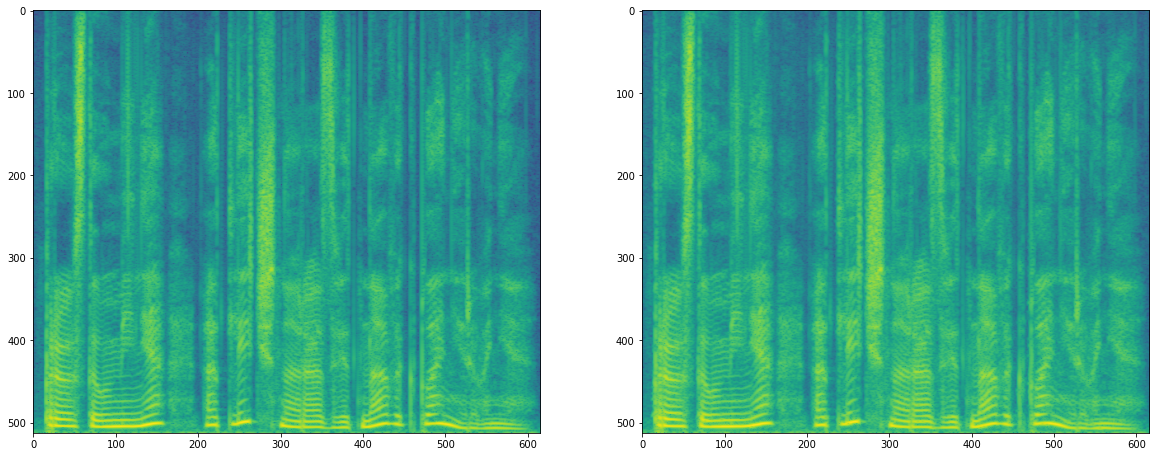

In [33]:
reconstructed_phase = griffin_lim(spectrogram, initial_phase, iterations=32)
reconstructed_signal = librosa.core.istft(spectrogram * np.exp(1j * reconstructed_phase), **stft_params)

# plt.figure(figsize=(20, 10))
# plt.subplot(311)
# plt.plot(a)
# plt.subplot(312)
# plt.plot(reconstructed_signal)
# plt.subplot(313)
# plt.plot(reconstructed_signal_random)
# write('reconstructed.wav', r, np.array(reconstructed_signal*2**15).astype(np.int16))

plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(np.log(1.e-12 + spectrogram[::-1]))
plt.subplot(122)
plt.imshow(np.log(1.e-12 + np.abs(librosa.core.stft(reconstructed_signal, **stft_params, n_fft=1024)[::-1])))

In [25]:
IPython.display.Audio("reconstructed.wav")

Домашнее задание:

1. Найти любую вавку 2-10 секунд
2. Используя только методы из библиотек numpy и scipy реализовать вычисление спектрограммы из аудио
3. Реализовать Griffin-Lim алгоритм для восстановления фазы
4. Реализовать любую автоматическую метрику качества для вокодера, исследовать, как на нее влияет число итераций в GL алгоритме
5.* Реализовать подсчет мел-спектрограммы из аудио (numpy и scipy, но можно сравнить результат с librosa). Получить из нее аудио обратно с помощью GL

Ноутбуки или скрипты можно присылать на почту sterling@phystech.edu

In [ ]:
@sterling239